In [1]:
# import lib and load data
import tensorflow as tf
# default line to load the dataset for the minist data
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()

In [2]:
# to the shape
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
# x_train[1]

In [5]:
# input shape of cnn should be with channel size 1
x_train = x_train.reshape(x_train.shape[0],28,28,1)# preprocess the data based on the need
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [6]:
# x_train[0]

In [7]:
# x_test

In [8]:
#converting the training and testing inputs into float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [9]:
# x_train

In [10]:
x_train /= 255
x_test /= 255

In [11]:
# x_train[1]

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),strides = 1,input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation = tf.nn.softmax))


C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, epochs=10, validation_data = (x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8886 - loss: 0.3625 - val_accuracy: 0.9774 - val_loss: 0.0724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9740 - loss: 0.0825 - val_accuracy: 0.9804 - val_loss: 0.0617
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9818 - loss: 0.0563 - val_accuracy: 0.9814 - val_loss: 0.0645
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9859 - loss: 0.0425 - val_accuracy: 0.9839 - val_loss: 0.0525
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9892 - loss: 0.0316 - val_accuracy: 0.9859 - val_loss: 0.0485
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9902 - loss: 0.0285 - val_accuracy: 0.9837 - val_loss: 0.0590
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9912 - loss: 0.0251 - val_accuracy: 0.9846 - val_loss: 0.0578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss: 0

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,822,184 (6.95 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,214,790 (4.63 MB)

In [16]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9794 - loss: 0.0801


[0.06610946357250214, 0.983299970626831]

In [17]:
test_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
import numpy as np
test_pred = np.argmax(test_pred,axis =1)
test_pred


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



C:\Users\kathi\AppData\Local\Temp\ipykernel_26188\3656610055.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


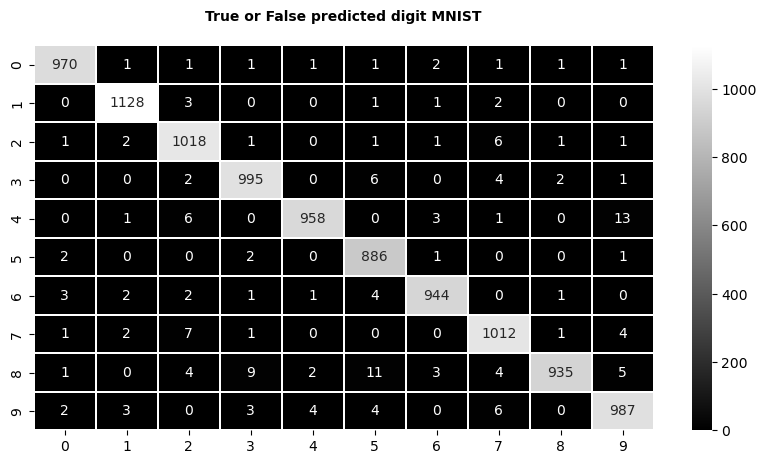

In [21]:
# confusion matrox
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
con_mat = confusion_matrix(y_test, test_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize =(10,5))
sns.heatmap(con_mat,annot =True,annot_kws ={'size':10},linewidth=0.3,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight ='bold',fontsize =10)
plt.show()

In [22]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


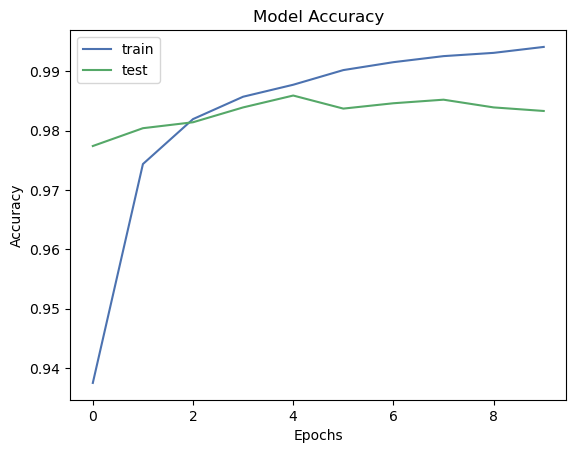

In [23]:
# summarization of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

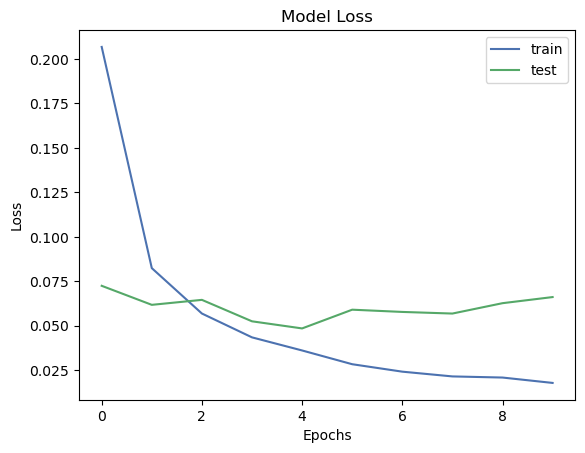

In [24]:
# summarization the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6


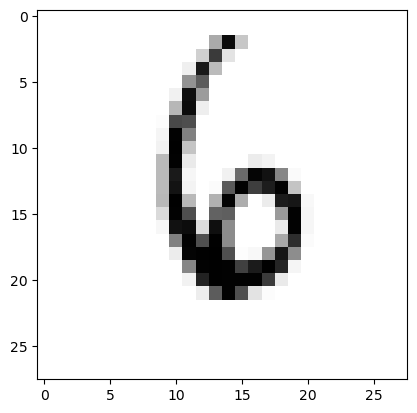

In [25]:
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())